<a href="https://colab.research.google.com/github/akhilvigneshsunkara/machine_learning_lab/blob/lab_experiments/lab4_AP23110010244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [8]:
file_path="dataset.csv"
data=pd.read_csv(file_path)
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

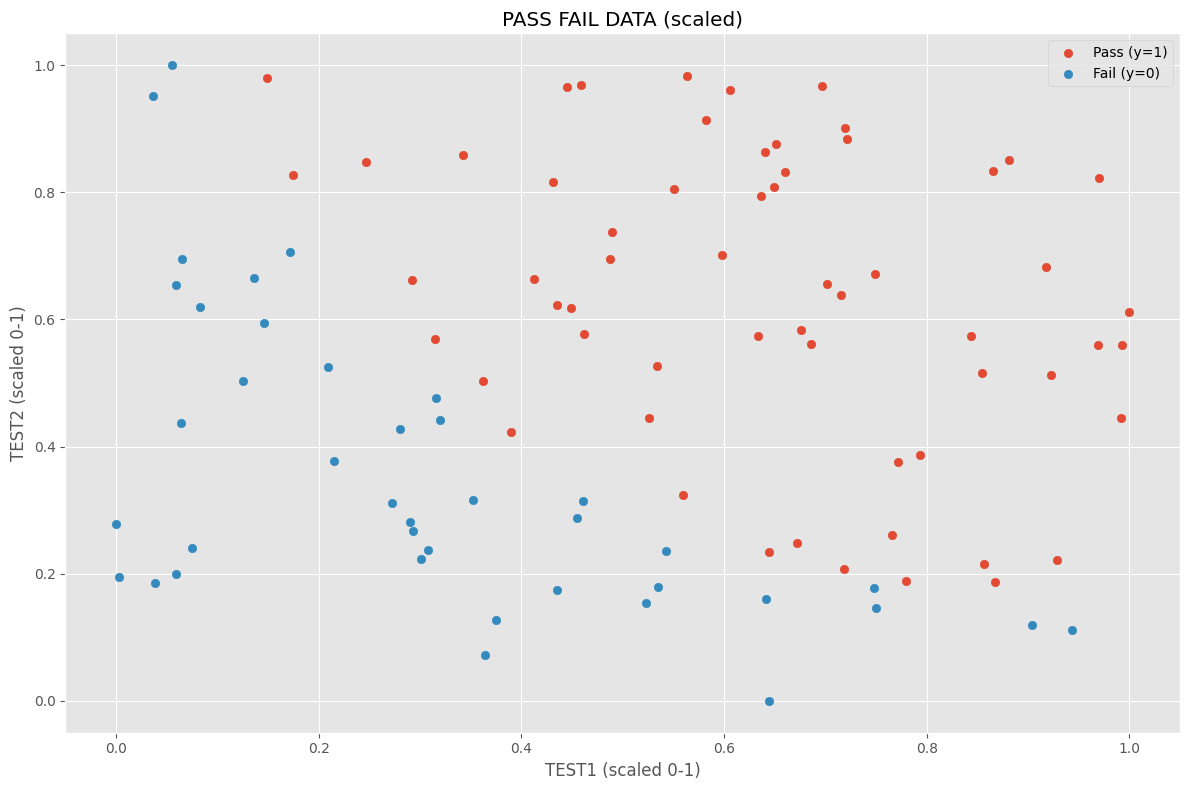

In [15]:
def minmax(a: np.ndarray):
    return (a - a.min()) / (a.max() - a.min())

test1 = minmax(data['DMV_Test_1'].values)
test2   = minmax(data['DMV_Test_2'].values)
y      = data['Results'].values.astype(float)

X = np.column_stack([test1, test2])  # shape (n, 2)

# Quick scatter
plt.figure()
plt.scatter(X[y==1,0], X[y==1,1], label='Pass (y=1)')
plt.scatter(X[y==0,0], X[y==0,1],label='Fail (y=0)')
plt.xlabel('TEST1 (scaled 0-1)')
plt.ylabel('TEST2 (scaled 0-1)')
plt.legend()
plt.title('PASS FAIL DATA (scaled)')
plt.tight_layout()
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [17]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [27]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    y = np.array(y)
    cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost, gradient(theta, X, y)

def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    y = np.array(y)
    grad = (1/m)*X.T @ (h - y)
    return grad

### Task 6: Cost and Gradient at Initialization
---

In [28]:
m = len(y)
theta = np.zeros(X.shape[1])
h_theta = sigmoid(X @ theta)


J_initial = (-1/m) * np.sum(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta))
print(f"Initial Cost: {J_initial}")


grad_initial = (1/m) * (X.T @ (h_theta - y))
print(f"Initial Gradient: {grad_initial}")

Initial Cost: 0.6931471805599453
Initial Gradient: [-0.12904484 -0.12015491]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [29]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []  # To store cost at each iteration

    for i in range(num_iterations):
        h_theta = sigmoid(X @ theta)
        grad = (1/m) * (X.T @ (h_theta - y))
        theta -= alpha * grad
        cost = (-1/m) * np.sum(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta))
        J_history.append(cost)

    return theta, J_history
theta_initial = np.zeros(X.shape[1])
alpha = 0.01  # Learning rate
num_iterations = 1000
optimized_theta, J_history = gradient_descent(X, y, theta_initial, alpha, num_iterations)
print(f"Optimized Theta: {optimized_theta}")
print(f"Final Cost: {J_history[-1]}")

Optimized Theta: [0.70180868 0.61273798]
Final Cost: 0.592441096116583


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

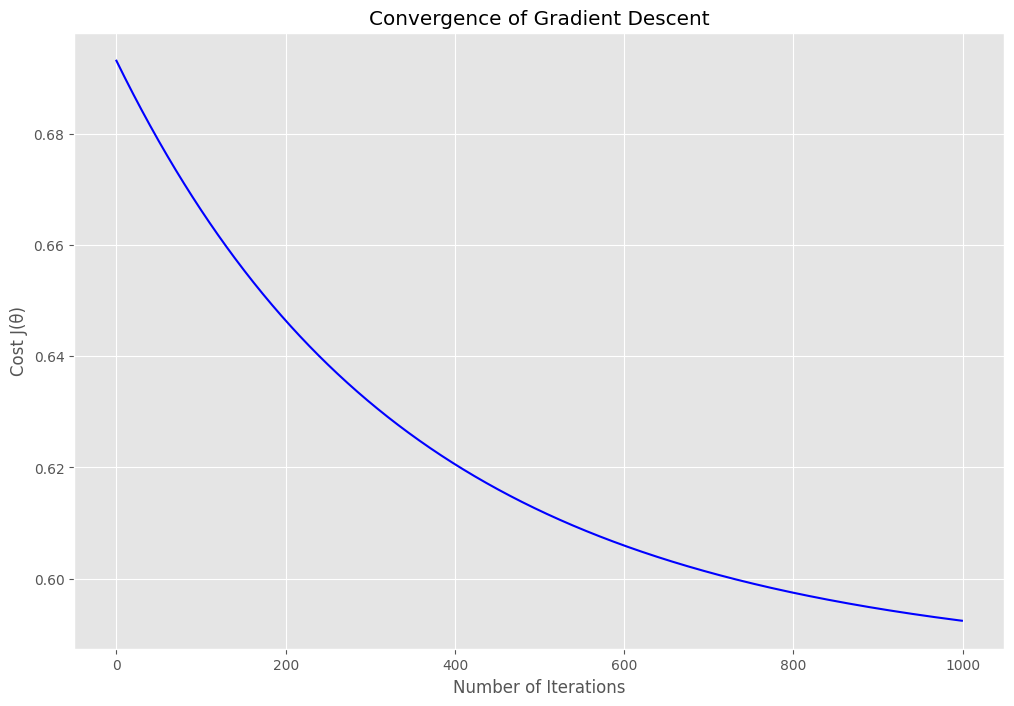

In [30]:
plt.figure()
plt.plot(range(len(J_history)), J_history, color='b')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J(θ)')
plt.title('Convergence of Gradient Descent')
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

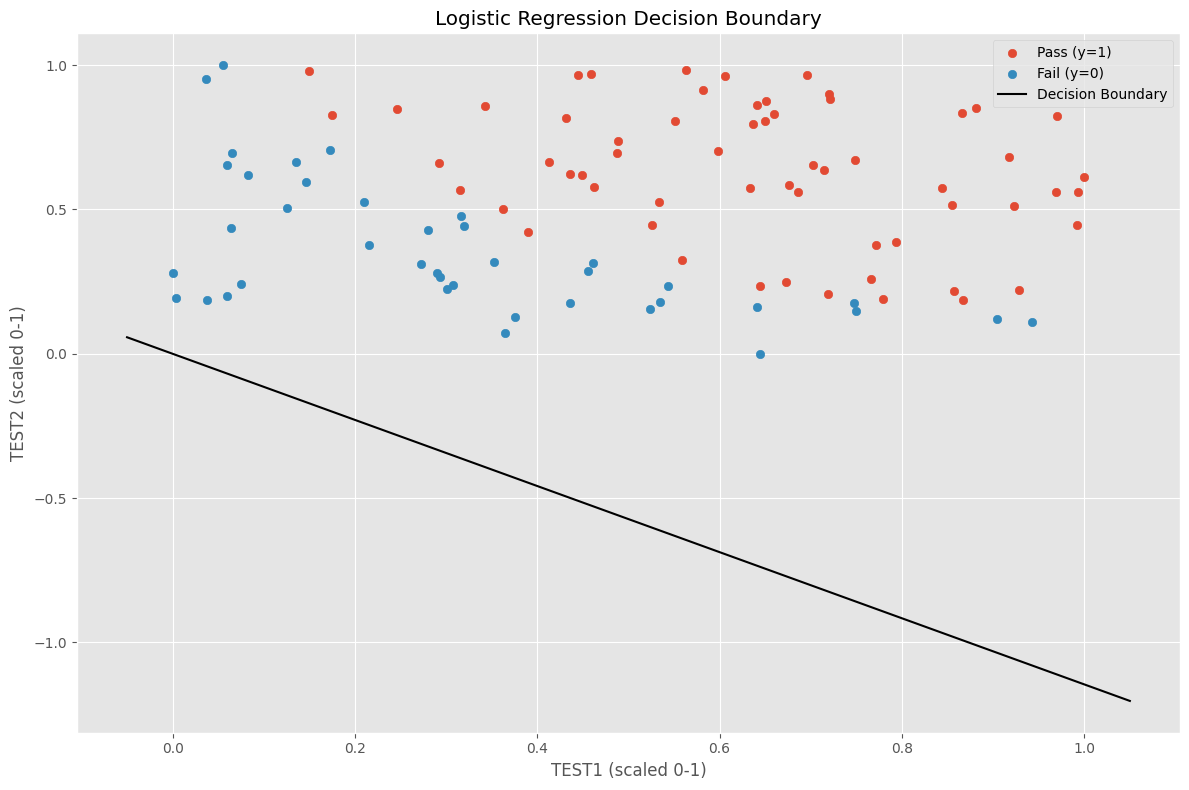

In [26]:
plt.scatter(X[y==1, 0], X[y==1, 1], label='Pass (y=1)')
plt.scatter(X[y==0, 0], X[y==0, 1], label='Fail (y=0)')
x_vals = np.array(plt.gca().get_xlim())
theta_final = optimized_theta
y_vals = -(theta_final[0] / theta_final[1]) * x_vals
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
plt.xlabel('TEST1 (scaled 0-1)')
plt.ylabel('TEST2 (scaled 0-1)')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.tight_layout()
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [31]:
def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= 0.5).astype(int)
predictions = predict(X, optimized_theta)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

Training Accuracy: 60.00%
